# Imports

In [11]:
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
import datetime
from scipy import optimize
import os
import geopandas as gpd
from geopandas import GeoSeries
%matplotlib inline

In [2]:
TAZs = gpd.read_file('Data/2630_TAZ_POLY_only/2630_TAZ_POLY_only.shp')

In [3]:
TAZs.sort_values(by='ID')

,ID,ID_1250,geometry
1350,1,100001,"POLYGON ((35.03563 31.86695, 35.03335 31.85942..."
1535,2,100012,"POLYGON ((34.79271 32.09945, 34.79276 32.09926..."
1720,3,100003,"POLYGON ((34.77363 32.10991, 34.78031 32.10606..."
1906,4,100003,"POLYGON ((34.77363 32.10991, 34.77924 32.11963..."
2090,5,100004,"POLYGON ((34.78652 32.14003, 34.78785 32.14541..."
...,...,...,...
2613,2626,101247,"POLYGON ((34.76564 31.39262, 34.76455 31.39282..."
1823,2627,101248,"POLYGON ((34.75835 31.39331, 34.75983 31.39272..."
2612,2628,101249,"POLYGON ((34.76616 31.39020, 34.76617 31.39024..."
2617,2629,101250,"POLYGON ((34.94141 29.55483, 34.94506 29.55499..."


In [5]:
TAZ_sectors = pd.read_excel('Data/Taz2CitySector.xlsx')

In [6]:
TAZ_2_city_geo = TAZs.merge(TAZ_sectors, right_on='Taz2630', left_on='ID')[['ID', 'geometry', 'Over8Population']]

In [25]:
city_geo = TAZ_2_city_geo.groupby(by='Over8Population').apply(lambda f: GeoSeries(f['geometry']).unary_union)

In [30]:
city_geo = city_geo.reset_index()

In [41]:
city_geo.columns = ['city_id', 'geometry']

In [42]:
city_geo

,city_id,geometry
0,400001,"POLYGON ((35.27526999999994 31.78809000000006,..."
1,400002,"POLYGON ((35.26429999999993 31.87490600000018,..."
2,400003,"POLYGON ((35.03633300000001 32.10003400000051,..."
3,400004,"POLYGON ((35.17064599999997 31.93157300000027,..."
4,400005,"POLYGON ((35.17278599999996 31.94797000000028,..."
...,...,...
865,400866,"POLYGON ((35.031795 31.53321199999969, 35.0224..."
866,400867,"POLYGON ((34.6126098189125 31.33945854689971, ..."
867,400868,"POLYGON ((35.25994099999993 31.66080599999988,..."
868,400869,"POLYGON ((35.00749900000001 31.55699699999973,..."


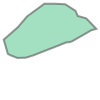

In [49]:
city_geo['geometry'].iloc[860]

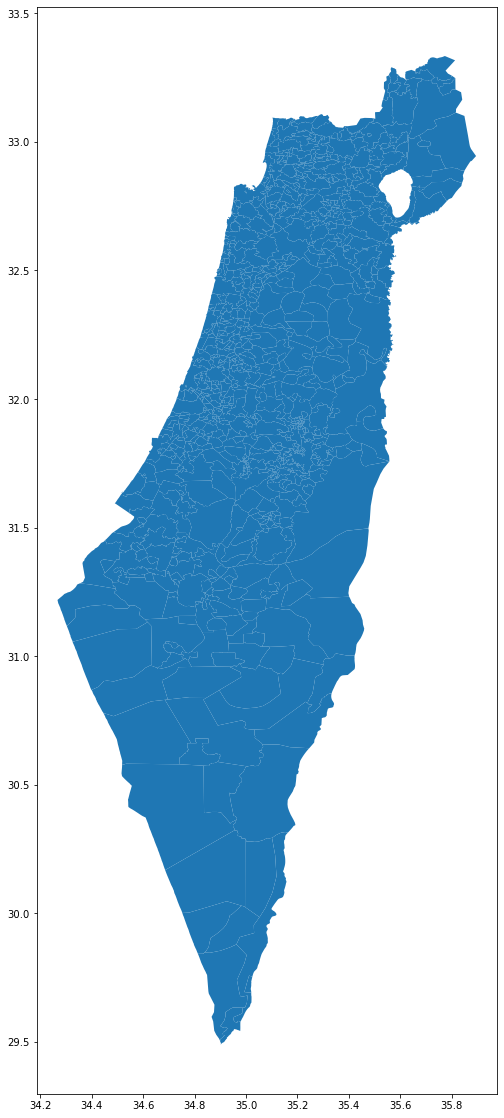

In [55]:
city_geo = gpd.GeoDataFrame(city_geo)

city_geo.plot(figsize=(10,20))

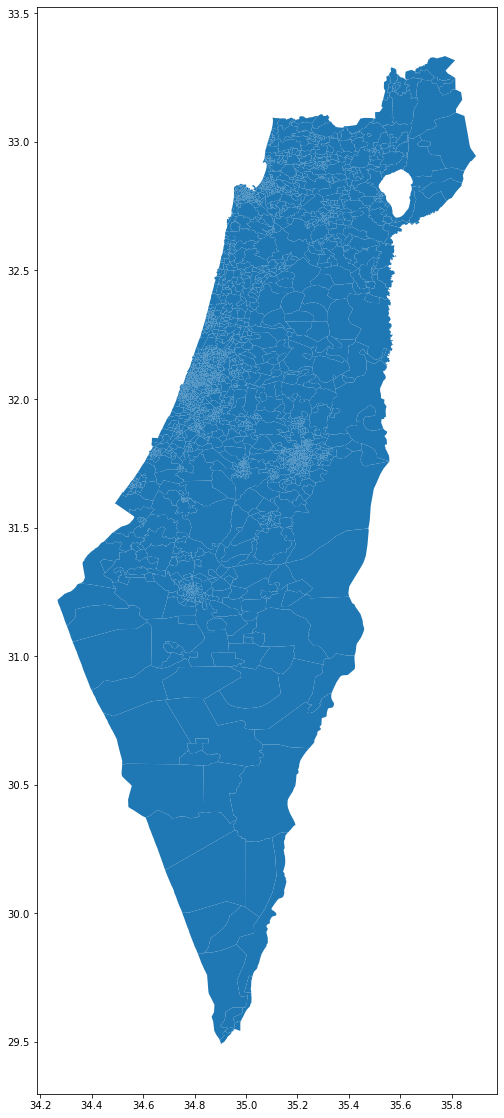

In [50]:
TAZs.plot(figsize=(10,20))

In [57]:
sector_names = TAZ_sectors[['CityNameSector', 'Over8Population']]
sector_names = sector_names.drop_duplicates()
sector_names

,CityNameSector,Over8Population
0,'שעלבים נוף איילון',400845
1,'תל אביב -יפו',400855
77,'תל אביב -יפו-ערבים-',400856
126,'הרצלייה',400299
153,'כפר שמריהו',400457
...,...,...
2620,'שמורת טבע נחלים גדולים',400842
2621,'מחנה רמון',400522
2623,'מחנה רחבעם',400521
2624,'גבים ומכללת ספיר',400219


In [58]:
city_geo = city_geo.merge(sector_names, left_on='city_id', right_on='Over8Population')[['city_id', 'CityNameSector', 'geometry']]

In [59]:
city_geo

,city_id,CityNameSector,geometry
0,400001,'א זעים',"POLYGON ((35.27527 31.78809, 35.27482 31.78791..."
1,400002,'א ראם',"POLYGON ((35.26430 31.87491, 35.27503 31.87810..."
2,400003,'א-זאוויה',"POLYGON ((35.03633 32.10003, 35.03843 32.09979..."
3,400004,'א-טירה מזרח',"POLYGON ((35.17065 31.93157, 35.17087 31.93159..."
4,400005,'א-טירה מערב',"POLYGON ((35.17279 31.94797, 35.17496 31.93905..."
...,...,...,...
865,400866,'תפוח',"POLYGON ((35.03180 31.53321, 35.02243 31.54268..."
866,400867,'תפרח גילת בטחה',"POLYGON ((34.61261 31.33946, 34.62039 31.33866..."
867,400868,'תקוע נוקדים',"POLYGON ((35.25994 31.66081, 35.26097 31.65546..."
868,400869,'תרקומיא / ח'ראס',"POLYGON ((35.00750 31.55700, 35.00621 31.55891..."


In [60]:
city_geo.to_file('Data/Sectors_poly.shp')